In [154]:
# In this notebook you will find data from my own Netflix account which is shared with my family. 
# The analyze will include several research questions. 

In [155]:
import pandas as pd
data = pd.read_csv("/Users/Nelia/Desktop/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")


In [156]:
# First off all, let´s have a look at the data we have before any analysis.  

In [157]:
data

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2022-11-23 23:51:10,00:10:13,NaN,Madagaskar,NaN,Apple TV 3 (revised),00:10:13,00:10:13,DE (Germany)
1,Kids,2021-08-04 11:05:32,01:31:24,NaN,Olsenbanden jr. går under vann,NaN,Apple TV 3 (revised),01:31:24,01:31:24,NO (Norway)
2,Kids,2021-04-11 13:44:43,01:20:12,NaN,Kjæledyrenes hemmelige liv 2,NaN,Apple TV 3 (revised),01:20:12,01:20:12,NO (Norway)
3,Kids,2020-09-03 06:52:11,00:04:19,NaN,Bamse – Verdens sterkeste bjørn: Bamse: Det st...,NaN,Safari MAC (Cadmium),00:04:21,00:04:21,NO (Norway)
4,Kids,2020-05-14 14:24:48,00:00:33,NaN,Slipp Willy fri,NaN,Apple TV 3 (revised),00:00:32,00:00:32,NO (Norway)
...,...,...,...,...,...,...,...,...,...,...
16006,Venke,2016-02-02 16:54:12,01:00:49,NaN,Lilo & Stitch,NaN,Chrome PC (Cadmium),01:00:49,01:00:49,US (United States)
16007,Venke,2016-01-23 15:40:11,00:00:05,NaN,Peaceful Warrior,NaN,Chrome PC (Cadmium),00:00:05,00:00:05,BR (Brazil)
16008,Venke,2016-01-23 12:50:58,02:04:25,NaN,Knocked Up,NaN,Chrome PC (Cadmium),02:04:25,02:04:25,NO (Norway)
16009,Venke,2014-09-23 13:56:51,00:00:01,NaN,Fornuft og følelser,NaN,PC,00:00:00,00:00:00,NO (Norway)


In [158]:
# First question: How much data do we have? 


In [159]:
data.size

160110

In [160]:
# Second question: What are the different categories (columns) available from this data set? 

In [161]:
data.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [162]:
data.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [163]:
# Third question: Let´s have a look at the different profiles. 
# How many profiles are active for this Netflix account? 

In [164]:
data["Profile Name"].unique()

array(['Kids', 'Kornelia', 'Sarah', 'Venke '], dtype=object)

In [165]:
# Fourth question: Which profile had the most viewing activity/interactions? 

In [166]:
data['Profile Name'].value_counts()

Kornelia    10473
Sarah        4815
Venke         697
Kids           26
Name: Profile Name, dtype: int64

In [167]:
# Let´s look at the fourth question in a plot. 

In [168]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

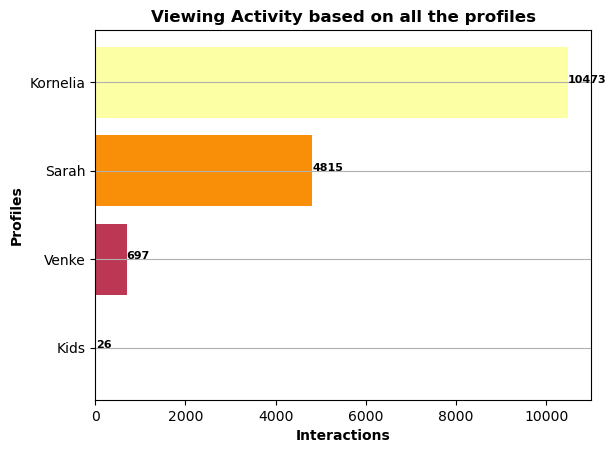

In [209]:
Profile_data = {"Kornelia":10473, "Sarah":4815, "Venke":697, "Kids":26}
Profile_Name = list(Profile_data.keys())
Profile_Values = list(Profile_data.values())
c = ("#fcffa4", "#f98e09", "#bc3754", "#57106e")
plt.barh (Profile_Name, Profile_Values, 0.8, color = c)
for index, value in enumerate (Profile_Values):
    plt.text(value, index, str (value), weight = "bold", size = 8)
plt.gca().invert_yaxis()
plt.grid(axis = "y")
plt.title ("Viewing Activity based on all the profiles", weight = "bold")
plt.ylabel ("Profiles", weight = "bold")
plt.xlabel ("Interactions", weight = "bold")
plt.show()

In [170]:
# Fifth question: What is the total time used on Netflix (based on all four profiles)?

In [171]:
data['Start Time'] = pd.to_datetime(data['Start Time'], utc = True)
data['Duration'] = pd.to_timedelta(data['Duration'])
data.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [172]:
data['Duration'].sum()

Timedelta('278 days 09:39:44')

In [173]:
# Sixth question: How much time have each profile used on Netflix, and which one has used it the most? 

In [174]:
data.loc[data['Profile Name']=='Kornelia','Duration'].sum()

Timedelta('185 days 19:02:49')

In [175]:
data.loc[data['Profile Name']=='Sarah','Duration'].sum()

Timedelta('78 days 08:41:59')

In [176]:
data.loc[data['Profile Name']=='Venke','Duration'].sum()

Timedelta('0 days 00:00:00')

In [177]:
data.loc[data['Profile Name']=='Kids','Duration'].sum()

Timedelta('0 days 10:44:03')

In [178]:
# Seventh question: Now let´s convert these numbers into seconds and look at the two most used profiles. 

In [179]:
data.loc[data['Profile Name']=='Kornelia','Duration'].astype('timedelta64[s]').sum()

16052569.0

In [180]:
data.loc[data['Profile Name']=='Sarah','Duration'].astype('timedelta64[s]').sum()

6770519.0

In [181]:
viewTime = {}
viewTime.update({"Kornelia": data.loc[data['Profile Name']=='Kornelia','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Sarah": data.loc[data['Profile Name']=='Sarah','Duration'].astype('timedelta64[s]').sum()})
viewTime

{'Kornelia': 16052569.0, 'Sarah': 6770519.0}

In [182]:
# Now, the seventh question will be turned into a plot to highlight the difference between the two most used 
# profiles on the account. 

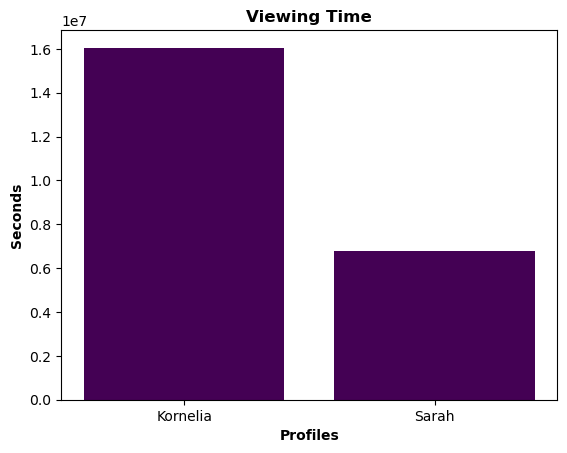

In [183]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.bar(*zip(*viewTime.items()), color = '#440154', )
plt.title ("Viewing Time", weight = "bold")
plt.ylabel ("Seconds", weight = "bold")
plt.xlabel ("Profiles", weight = "bold")

ax = plt.gca()
ax.tick_params(axis ='x', colors ='black')
ax.tick_params(axis ='y', colors ='black')


plt.show()


In [184]:
# Eighth question: Which device types has been used to watch netflix?
# Which one has been most used based on all profiles? 

In [185]:
data["Device Type"].unique()

array(['Apple TV 3 (revised)', 'Safari MAC (Cadmium)',
       'Apple iPhone 7 (GSM)', 'Apple Apple TV 4K 3rd Gen Apple TV',
       'iPhone 12 Pro', 'Netflix Chrome MAC (Cadmium) HTML 5',
       'Telenor TNR-3770CF MVPD STB', 'Apple iPhone 8 Plus (GSM)',
       'iPad Pro 9.7-Inch (WiFi/LTE)', 'Chrome PC (Cadmium)',
       'Apple iPhone 7 Plus (GSM)',
       'Google Chromecast V3 Streaming Stick', 'iPhone 5S CDMA', 'Mobile',
       'Internet Explorer (Cadmium)', 'PC', 'Mac',
       'Windows 8 x64 devices', 'Apple iPhone 5 with CDMA',
       'Apple iPhone 11 Pro', 'Apple iPad 6th Gen 9.7 (Wi-Fi) iPad',
       'Apple iPhone XS', 'Apple iPhone 8 (GSM)', 'Edge (Cadmium)',
       'Apple iPhone 6s',
       'Android DefaultWidevineL3Tablet Android Tablet',
       'Apple iPhone 4S'], dtype=object)

In [186]:
data['Device Type'].value_counts()

Safari MAC (Cadmium)                              5399
Apple TV 3 (revised)                              2592
Chrome PC (Cadmium)                               1709
Netflix Chrome MAC (Cadmium) HTML 5               1190
Internet Explorer (Cadmium)                       1078
Mac                                                626
Edge (Cadmium)                                     554
iPad Pro 9.7-Inch (WiFi/LTE)                       464
Apple iPad 6th Gen 9.7 (Wi-Fi) iPad                319
iPhone 12 Pro                                      234
iPhone 5S CDMA                                     210
Apple iPhone 6s                                    197
Telenor TNR-3770CF MVPD STB                        196
Apple iPhone 11 Pro                                187
PC                                                 186
Apple iPhone 8 Plus (GSM)                          185
Windows 8 x64 devices                              146
Apple iPhone 4S                                    111
Mobile    

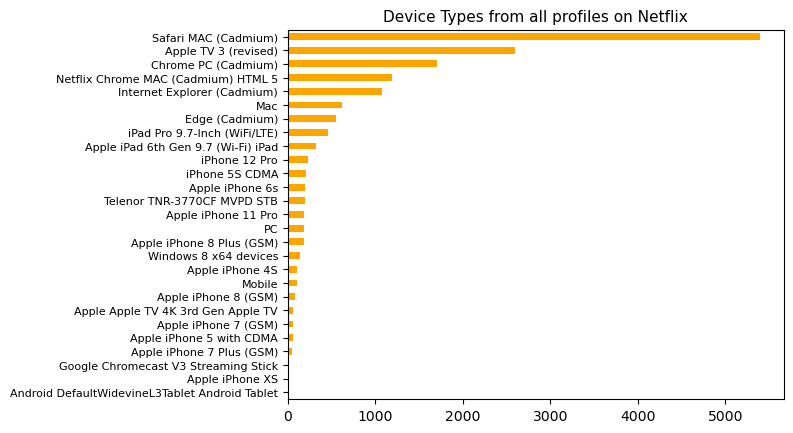

In [187]:
data['Device Type'].value_counts().plot(kind ="barh", color = "Orange")
plt.title ("Device Types from all profiles on Netflix", size = 11)
plt.yticks (size = 8)
plt.xticks (size = 10)
plt.gca().invert_yaxis()
plt.show() 

In [188]:
# Ninth question: Which devices was most used by Kornelia´s profile? 
# Illustrated by a pie chart of top 4. 

In [189]:
data2 = data[data['Profile Name'] == 'Kornelia']

In [190]:
data2['Device Type'].value_counts()

Safari MAC (Cadmium)                    5116
Apple TV 3 (revised)                    2102
Netflix Chrome MAC (Cadmium) HTML 5     1170
Chrome PC (Cadmium)                      747
Mac                                      568
iPhone 12 Pro                            234
Apple iPhone 8 Plus (GSM)                185
iPhone 5S CDMA                            81
Apple Apple TV 4K 3rd Gen Apple TV        58
Apple iPhone 5 with CDMA                  56
Apple iPhone 7 (GSM)                      47
Apple iPhone 7 Plus (GSM)                 44
Mobile                                    33
Telenor TNR-3770CF MVPD STB               10
Internet Explorer (Cadmium)                9
Windows 8 x64 devices                      4
Google Chromecast V3 Streaming Stick       3
iPad Pro 9.7-Inch (WiFi/LTE)               3
PC                                         3
Name: Device Type, dtype: int64

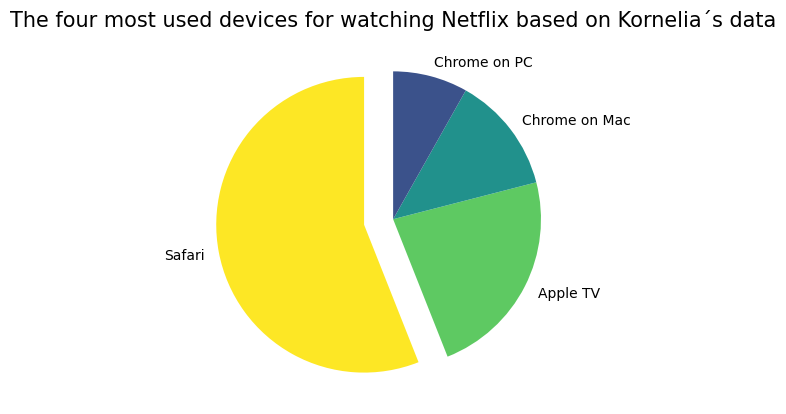

In [191]:
import matplotlib.pyplot as plt
import numpy as np 
y = np.array([5116, 2102, 1170, 747])
mylabels = ["Safari", "Apple TV", "Chrome on Mac", "Chrome on PC"]
mycolors = ["#fde725", "#5ec962", "#21918c", "#3b528b"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, colors = mycolors, explode = myexplode, startangle = 90)
plt.title ("The four most used devices for watching Netflix based on Kornelia´s data", size = 15)
plt.show() 


In [192]:
# Tenth question: In which countries have the profiles watched the most netflix? Based on this data set. 

In [193]:
data2['Country'].value_counts()

NO (Norway)            9661
US (United States)      769
PT (Portugal)            21
UG (Uganda)               5
KE (Kenya)                3
LK (Sri Lanka)            2
LV (Latvia)               2
DE (Germany)              2
MV (Maldives)             1
RW (Rwanda)               1
ZZ (Unknown Region)       1
GB (United Kingdom)       1
NL (Netherlands)          1
FR (France)               1
CA (Canada)               1
SE (Sweden)               1
Name: Country, dtype: int64

In [194]:
# Eleventh question: In which country has Kornelia watched the most netflix? Top 5. 

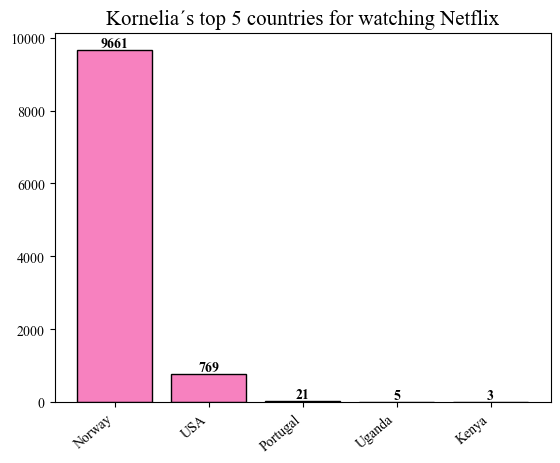

In [195]:
import matplotlib.pyplot as plt
Country = ["Norway", "USA", "Portugal", "Uganda", "Kenya"]
values_country = [9661, 769, 21, 5, 3]

barplot = plt.bar (x = Country, height = values_country, fc = "#f781bf", ec = "black")
plt.bar_label(barplot, labels = values_country, label_type = "edge", font = "Times New Roman", weight = "bold")
plt.yticks (font = "Times New Roman")
plt.xticks (rotation = 40, ha = "right", font = "Times New Roman")
plt.title ("Kornelia´s top 5 countries for watching Netflix", font = "Times New Roman", size = 15)
plt.show()

In [196]:
# Twelfth question: Where in the world has the van Ingen family watched Netflix the most?
# In addition, here I used a non-linear axe with log, as the values are so spread, and the previous plot is not 
# extremely clear, however the value labels work as an indication for the differences. 

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
df = pd.read_csv("/Users/Nelia/Desktop/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")

In [199]:
total_per_country = df.groupby(by = "Country").count()
total_per_country_sorted = total_per_country.sort_values (by = "Bookmark", ascending = False) 

In [200]:
total_per_country_sorted

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark
Country,,,,,,,,,
NO (Norway),14283,14283,14283,2269,14283,495,14283,14283,14283
US (United States),964,964,964,1,964,0,964,964,964
GB (United Kingdom),557,557,557,100,557,0,557,557,557
NL (Netherlands),94,94,94,8,94,0,94,94,94
PT (Portugal),33,33,33,1,33,0,33,33,33
DE (Germany),28,28,28,0,28,0,28,28,28
GR (Greece),16,16,16,0,16,0,16,16,16
UG (Uganda),5,5,5,0,5,0,5,5,5
MX (Mexico),4,4,4,4,4,4,4,4,4


In [201]:
x = list(total_per_country_sorted.index)
y = list (total_per_country_sorted["Bookmark"])

/var/folders/33/2xq5nttd3n3b46lsn78nq7w40000gn/T/ipykernel_43665/1135416744.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (x, rotation = 45, ha = "right", size = 9, font ="Times New Roman")


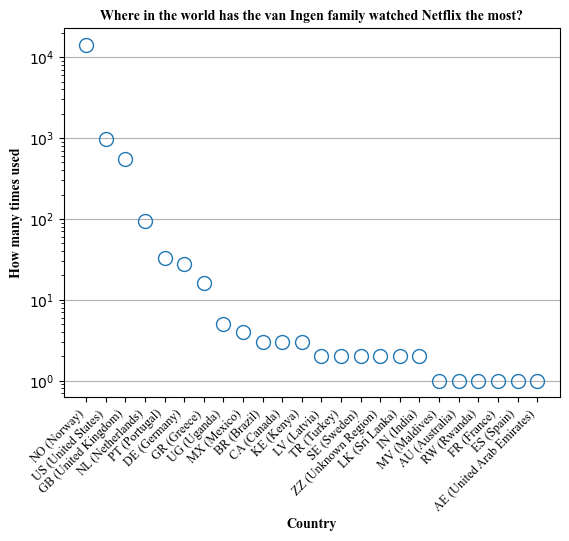

In [202]:
f,ax = plt.subplots()
ax.plot (x, y, linestyle = "none", marker = ".", markersize = 20, fillstyle = "none", color = "C0" )
ax.set_xticklabels (x, rotation = 45, ha = "right", size = 9, font ="Times New Roman")
ax.set_ylabel ("How many times used", weight = "bold", font ="Times New Roman")
ax.set_xlabel ("Country", weight = "bold", font ="Times New Roman")
ax.set_title ("Where in the world has the van Ingen family watched Netflix the most?", font ="Times New Roman", weight = "bold")
ax.grid (axis = "y")
ax.set_yscale("log")

In [203]:
# Thirteenth question: Did Kornelia and Sarah both watch the movie called "Someone Great" on Netflix? 

In [204]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv("/Users/Nelia/Desktop/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")

In [206]:
df.keys ()

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [207]:
smole = df[df["Title"] == "Someone Great"]
"Someone Great" in df["Title"]

False

In [208]:
filter2 = filter (lambda a: "Someone Great" in a, df ["Title"])
print (smole)

      Profile Name           Start Time  Duration  \
599       Kornelia  2022-06-03 17:10:23  01:27:51   
1284      Kornelia  2021-07-04 21:40:21  01:28:00   
2951      Kornelia  2019-12-06 21:09:55  01:27:58   
3592      Kornelia  2019-05-18 17:45:44  01:27:56   
10593        Sarah  2022-05-14 22:30:41  00:00:07   
11021        Sarah  2021-06-27 21:31:01  00:00:36   
11094        Sarah  2020-11-26 18:34:20  01:28:32   

                                   Attributes          Title  \
599                                       NaN  Someone Great   
1284                                      NaN  Someone Great   
2951                                      NaN  Someone Great   
3592   Autoplayed: user action: Unspecified;   Someone Great   
10593                                     NaN  Someone Great   
11021                                     NaN  Someone Great   
11094                                     NaN  Someone Great   

      Supplemental Video Type                          Device 